**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, roc_curve, auc, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Data Input**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/Machine-Learning-Landslide-Prediction-main/Landslide_dataset.csv')
data.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318


**Data Analysis/Cleaning**

In [ ]:
features_list = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_list:
    #data[feature].isnull() indicates whether each value in the column is missing or not
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("There are no missing values.")

There are no missing values.


,count
Landslide,
0,181236
1,9654


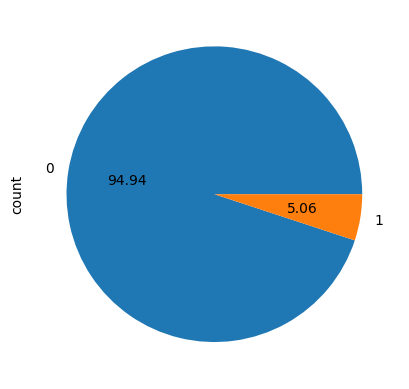

In [ ]:
#Separate features and target variable
X=data.drop('Landslide', axis=1)
Y=data['Landslide']

#Checking different class numbers in the target variable
Y.value_counts().plot.pie(autopct='%.2f')
Y.value_counts()

**Undersampling**

,count
Landslide,
0,13791
1,9654


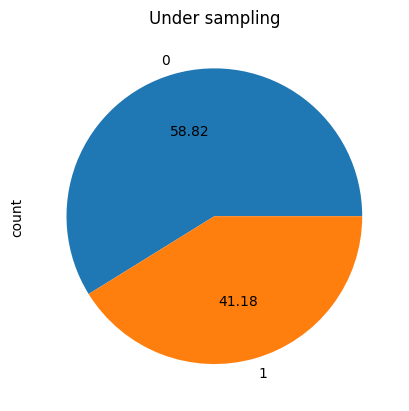

In [ ]:
rus=RandomUnderSampler(sampling_strategy=0.7)
X_res, Y_res = rus.fit_resample(X, Y)
ax=Y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Under sampling")
Y_res.value_counts()

**Data Processing**

In [ ]:
#Separate features and target variable
# X=data.drop('Landslide', axis=1)
# Y=data['Landslide']

#Splitting the dataset into the training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)

**Exploratory Data Analysis (EDA) and Visualization**

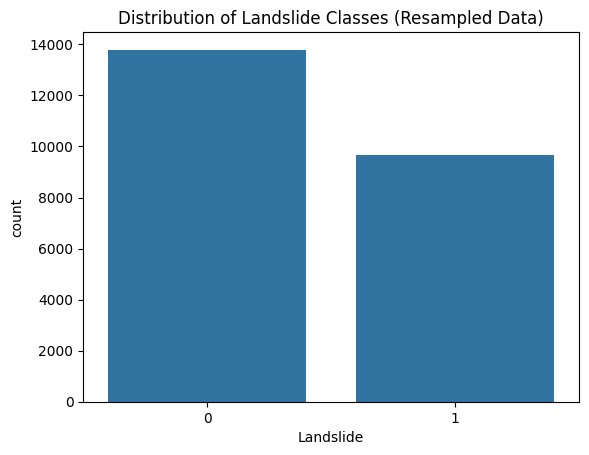

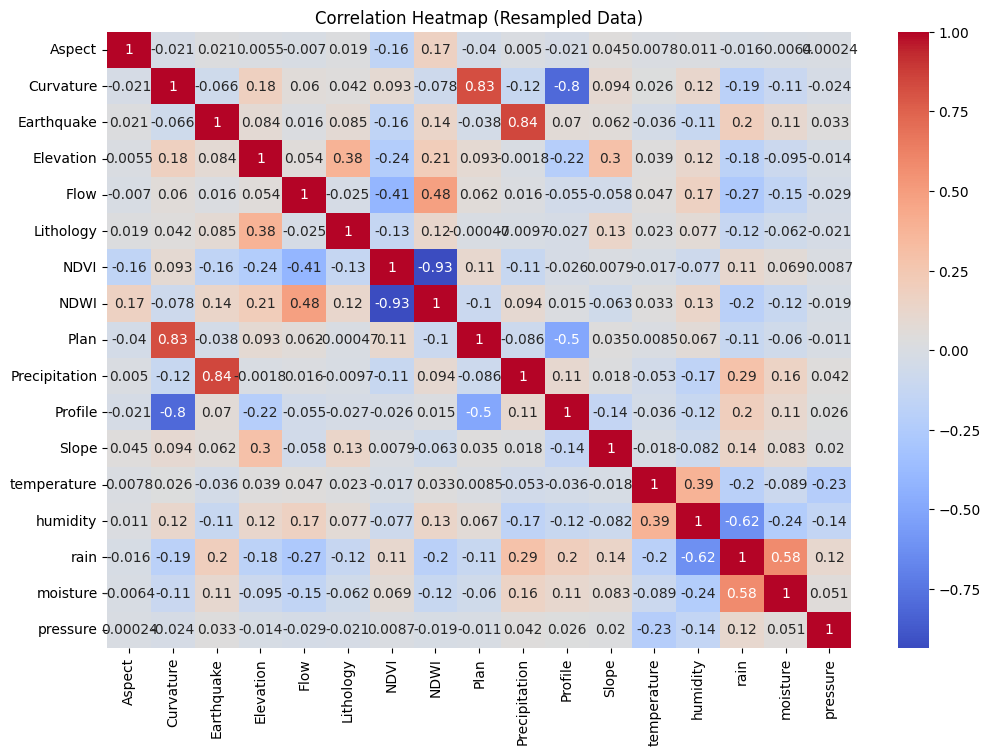

In [ ]:
sns.countplot(x=Y_res, data=pd.DataFrame({'Landslide': Y_res}))
plt.title('Distribution of Landslide Classes (Resampled Data)')
plt.show()

# Correlation heatmap with resampled data
numeric_data_resampled = pd.DataFrame(X_res, columns=X.columns).select_dtypes(include=[np.number])
corr_resampled = numeric_data_resampled.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_resampled, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Resampled Data)')
plt.show()

**Fit model - Random Forest**

In [ ]:
# Fit Random Forest Classifier
model_rfc = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt', n_estimators=100)
model_rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

**Feature Importance**

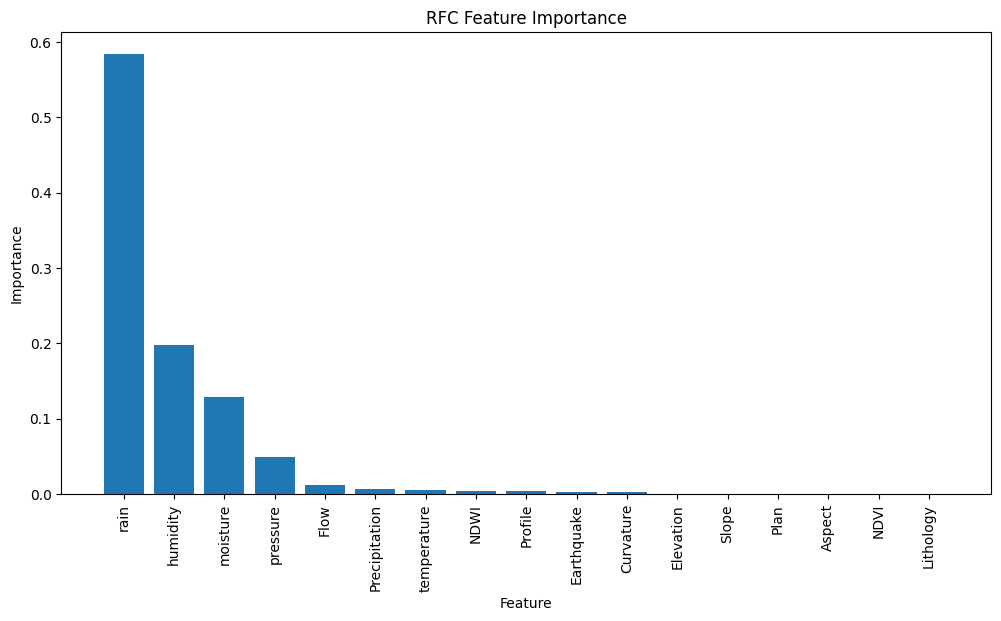

In [ ]:
#Predict on the test set
Y_pred = model_rfc.predict(X_test)

#Get feature importances from the trained Random Forest model
feature_importances = model_rfc.feature_importances_

#Get feature names from the X_train columns
feature_names = X_train.columns

#Sort in descending order
sorted = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("RFC Feature Importance")
plt.show()

**Precision, Recall, F1 and Accuracy values**

Precision: 0.9845995893223819
Recall: 0.9876416065911432
F1-score: 0.9861182519280205
Accuracy: 0.9884836852207294


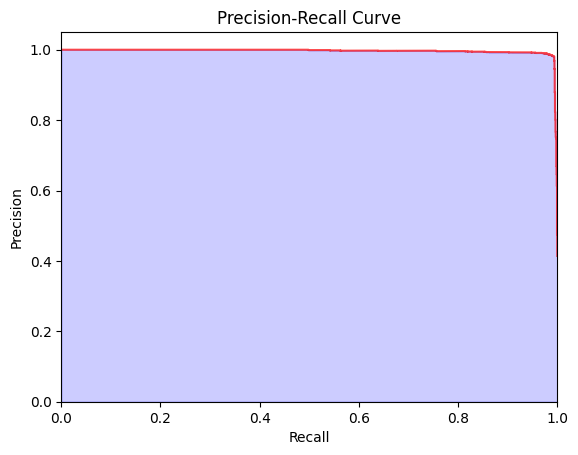

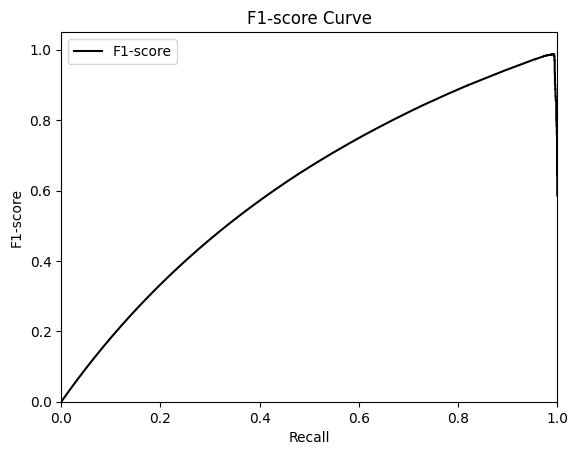

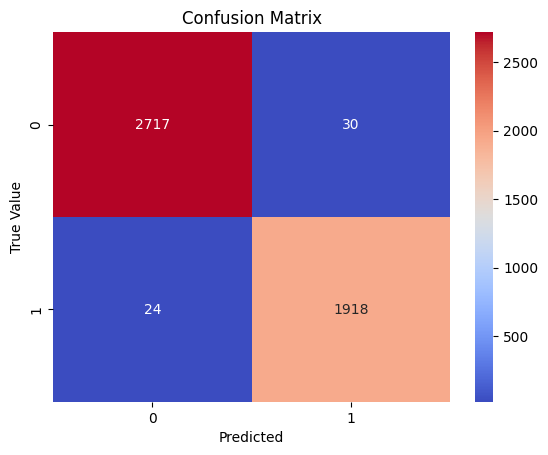

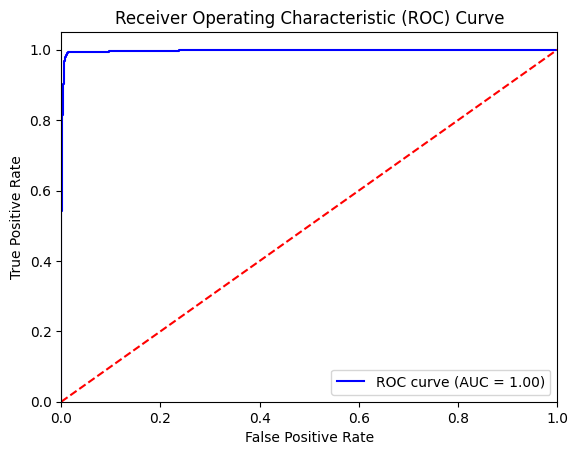

In [ ]:
# Predict on the test set
Y_pred = model_rfc.predict(X_test)

# Evaluate additional metrics
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

# Plot Precision-Recall curve

#This line predicts the probability estimates of the positive class
Y_pred_probs = model_rfc.predict_proba(X_test)[:, 1]
#calculates precision and recall values at different probability thresholds
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_probs)

plt.step(recall, precision, color='r', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='k', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix(used to evaluate the performance of a classification model)
cm = confusion_matrix(Y_test, Y_pred)

#Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC (fpr, tpr, thresholds --  arrays)
Y_pred_probs = model_rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve (graphical representation of the trade-off between true positive rate and false positive rate at various thresholds)
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Train and Test results curve**

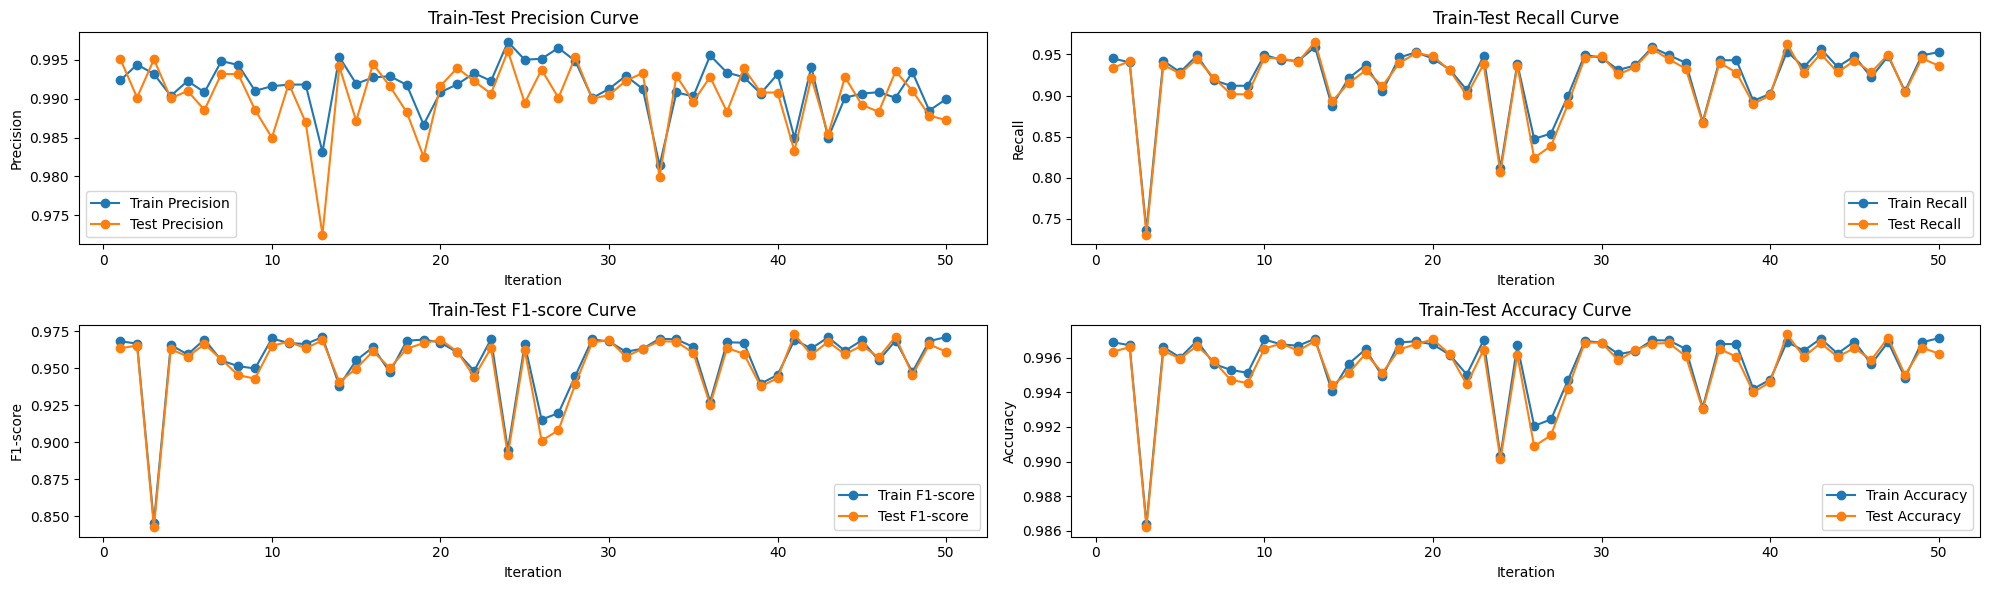

In [ ]:
#lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

#Number of iterations for train-test splits
num_iterations = 50

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)

    # Step 3: Model training
    model_rfc = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt', n_estimators=100)
    model_rfc.fit(X_train, Y_train)

    # Step 4: Model evaluation on train and test sets
    Y_train_pred = model_rfc.predict(X_train)
    Y_test_pred = model_rfc.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(Y_train, Y_train_pred))
    test_precision.append(precision_score(Y_test, Y_test_pred))

    train_recall.append(recall_score(Y_train, Y_train_pred))
    test_recall.append(recall_score(Y_test, Y_test_pred))

    train_f1.append(f1_score(Y_train, Y_train_pred))
    test_f1.append(f1_score(Y_test, Y_test_pred))

    train_accuracy.append(accuracy_score(Y_train, Y_train_pred))
    test_accuracy.append(accuracy_score(Y_test, Y_test_pred))

# Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()
